# Predicting Fraudulent Ethereum Transactions
The goal of this project is to accurately predict fraudulent transactions made over Ethereum, a popular cryptocurrency.

## Table of contents
* [1. Introduction](#sec1)
    * [1.1 Dataset description](#sec1_1)
    * [1.2 Overview](#sec1_2)

* [2. Exploratory Analysis](#sec2)
    * [2.1 Missing values](#sec2_1)
    * [2.2 Feature Selection](#sec2_2)
    * [2.3 Outliers](#sec2_3)
    * [2.4 Split into train and test sets](#sec2_4)
    * [2.5 Clustered heatmap of correlations](#sec2_5)
    * [2.6 Normalization](#sec2_6)
    * [2.7 Balancing the dataset](#sec2_7)

* [3. Prediction Models](#sec3)
    * [3.1 Logistic regression](#sec3_1)
    * [3.2 Decision Tree](#sec3_2)
    * [3.3 Random Forest Classifier](#sec3_3)
    * [3.4 XGB Classifier](#sec3_4)
    * [3.5 K-Nearest Neighbors (KNN)](#sec3_5)
    * [3.6 Naive Bayes](#sec3_6)
    
* [4. Performance Comparison of the Different Models](#sec4)
* [5. Conclusion](#sec5)
* [What to do Next](#sec_next)

# 1. Introduction<a class="anchor" id="sec1"></a>
## 1.1 Dataset Description<a class="anchor" id="sec1_1"></a>
This dataset contains rows of known fraud and valid transactions. Here is a description of the columns:

- `Index`: the index number of a row
- `Address`: the address of the ethereum account
- `FLAG`: whether the transaction is fraud or not
- `Avg min between sent tnx`: Average time between sent transactions for account in minutes
- `Avg min between received tnx`: Average time between received transactions for account in minutes
- `Time Diff between first and_last (Mins)`: Time difference between the first and last transaction
- `Sent_tnx:` Total number of sent normal transactions
- `Received_tnx:` Total number of received normal transactions
- `NumberofCreated_Contracts:` Total Number of created contract transactions
- `UniqueReceivedFrom_Addresses:` Total Unique addresses from which account received transaction
- `UniqueSentTo_Addresses20:` Total Unique addresses from which account sent transactions
- `MinValueReceived:` Minimum value in Ether ever received
- `MaxValueReceived:` Maximum value in Ether ever received
- `AvgValueReceived5Average:` value in Ether ever received
- `MinValSent:` Minimum value of Ether ever sent
- `MaxValSent:` Maximum value of Ether ever sent
- `AvgValSent:` Average value of Ether ever sent
- `MinValueSentToContract:` Minimum value of Ether sent to a contract
- `MaxValueSentToContract:` Maximum value of Ether sent to a contract
- `AvgValueSentToContract:` Average value of Ether sent to contracts
- `TotalTransactions(IncludingTnxtoCreate_Contract):` Total number of transactions
- `TotalEtherSent:`Total Ether sent for account address
- `TotalEtherReceived:` Total Ether received for account address
- `TotalEtherSent_Contracts:` Total Ether sent to Contract addresses
- `TotalEtherBalance:` Total Ether Balance following enacted transactions
- `TotalERC20Tnxs:` Total number of ERC20 token transfer transactions
- `ERC20TotalEther_Received:` Total ERC20 token received transactions in Ether
- `ERC20TotalEther_Sent:` Total ERC20token sent transactions in Ether
- `ERC20TotalEtherSentContract:` Total ERC20 token transfer to other contracts in Ether
- `ERC20UniqSent_Addr:` Number of ERC20 token transactions sent to Unique account addresses
- `ERC20UniqRec_Addr:` Number of ERC20 token transactions received from Unique addresses
- `ERC20UniqRecContractAddr:` Number of ERC20token transactions received from Unique contract addresses
- `ERC20AvgTimeBetweenSent_Tnx:` Average time between ERC20 token sent transactions in minutes
- `ERC20AvgTimeBetweenRec_Tnx:` Average time between ERC20 token received transactions in minutes
- `ERC20AvgTimeBetweenContract_Tnx:` Average time ERC20 token between sent token transactions
- `ERC20MinVal_Rec:` Minimum value in Ether received from ERC20 token transactions for account
- `ERC20MaxVal_Rec:` Maximum value in Ether received from ERC20 token transactions for account
- `ERC20AvgVal_Rec:` Average value in Ether received from ERC20 token transactions for account
- `ERC20MinVal_Sent:` Minimum value in Ether sent from ERC20 token transactions for account
- `ERC20MaxVal_Sent:` Maximum value in Ether sent from ERC20 token transactions for account
- `ERC20AvgVal_Sent:` Average value in Ether sent from ERC20 token transactions for account
- `ERC20UniqSentTokenName:` Number of Unique ERC20 tokens transferred
- `RC20UniqRecTokenName:` Number of Unique ERC20 tokens received
- `ERC20MostSentTokenType:` Most sent token for account via ERC20 transaction
- `ERC20MostRecTokenType:` Most received token for account via ERC20 transactions

### Source:
https://www.kaggle.com/vagifa/ethereum-frauddetection-dataset

## 1.2 Overview<a class="anchor" id="sec1_2"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Importing Dataset
df = pd.read_csv("transaction_dataset.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

0    7662
1    2179
Name: FLAG, dtype: int64


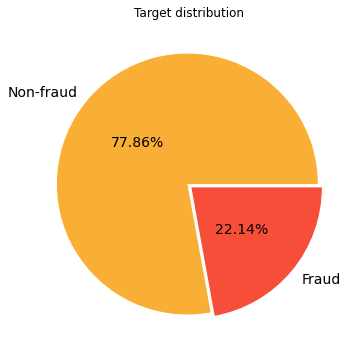

In [3]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[6,6])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

We can see that this is an **imbalanced dataset**. As is often the case with fraud detection problems, there are much more cases of valid transaction than fraudulent. This is a problem because our learning algorithms could achieve a relatively high level of performance without paying much attention to the fraudulent cases. And since this is exactly what we are most interested in predicting, it is crucial that we **balance the dataset**. There are several resampling techniques for this, such as **random subsampling** of the majority class, **random oversampling** of the minority class, or a combination of both. More on this later.

# 2. Exploratory Analysis<a class="anchor" id="sec2"></a>
## 2.1 Missing Values<a class="anchor" id="sec2_1"></a>
We will impute missing values using the median.

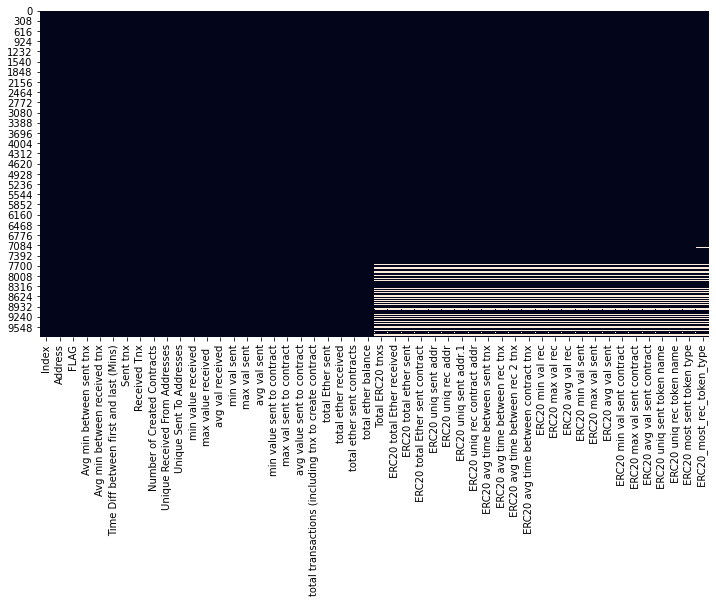

In [4]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [5]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

## 2.2 Feature Selection<a class="anchor" id="sec2_2"></a>

In [6]:
# Omit first two columns (Index, Address)
df = df.iloc[:,2:]
df.shape

(9841, 48)

In [7]:
# Drop the two categorical features
categories = df.select_dtypes('O').columns#.astype('category')
df.drop(df[categories], axis=1, inplace=True)
df.shape

(9841, 46)

### Drop features with zero variance

In [8]:
# Inspect features variance
df.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

Variance is range-dependent, therefore we need to do normalization before dropping features based on low variance. However, we want to drop variables with **null** variance. Since zero variance is not affected by normalization, we don't need to worry about this.

In [9]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


(9841, 39)


### Drop columns that are almost always zero
Because they won't be helpful for our models.

In [10]:
# Some features present a small distribution
drops = []
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        drops.append(i)
#         print(f' {i} has the following distribution: \n{df[i].value_counts()}')
        print('Unique values of column:', i)
#         print(i, ': \n', df[i].value_counts())
        print(df[i].value_counts())
        print()

Unique values of column: min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64

Unique values of column: max val sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: max val sent to contract, dtype: int64

Unique values of column: avg value sent to contract
0.000000    9838
0.023014       1
0.020000       1
0.010000       1
Name: avg value sent to contract, dtype: int64

Unique values of column: total ether sent contracts
0.000000    9838
0.020000       1
0.046029       1
0.010000       1
Name: total ether sent contracts, dtype: int64

Unique values of column:  ERC20 uniq sent addr.1
0.0    9813
1.0      26
2.0       1
3.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64



In [11]:
print('Dropped columns:\n')
print(*drops, sep='\n')
df.drop(drops, axis=1, inplace=True)

print()
print(df.shape)

Dropped columns:

min value sent to contract
max val sent to contract
avg value sent to contract
total ether sent contracts
 ERC20 uniq sent addr.1

(9841, 34)


### `SelectKBest`
In order to reduce the dimensionality of our problem, we use sklearn's `SelectKBest` class, which removes all but the $k$ highest scoring features (we choose $k=14$).

As a scoring function we use `f_classif`, which computes the ANOVA F-value for the provided sample. This is an estimate of the degree of linear dependency between two random variables.

In [12]:
# define X and y:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 33) (9841,)


In [13]:
k=14
X_selected = SelectKBest(f_classif, k=k).fit_transform(X, y)
model= SelectKBest(f_classif, k=k).fit(X,y)

Selected_feature_names=X.columns[model.get_support()]
X = X[Selected_feature_names]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Avg min between sent tnx                              9841 non-null   float64
 1   Avg min between received tnx                          9841 non-null   float64
 2   Time Diff between first and last (Mins)               9841 non-null   float64
 3   Sent tnx                                              9841 non-null   int64  
 4   Received Tnx                                          9841 non-null   int64  
 5   Unique Received From Addresses                        9841 non-null   int64  
 6   Unique Sent To Addresses                              9841 non-null   int64  
 7   avg val sent                                          9841 non-null   float64
 8   total transactions (including tnx to create contract  9841

## 2.3 Outliers<a class="anchor" id="sec2_3"></a>
We visualize the outliers using box plots.

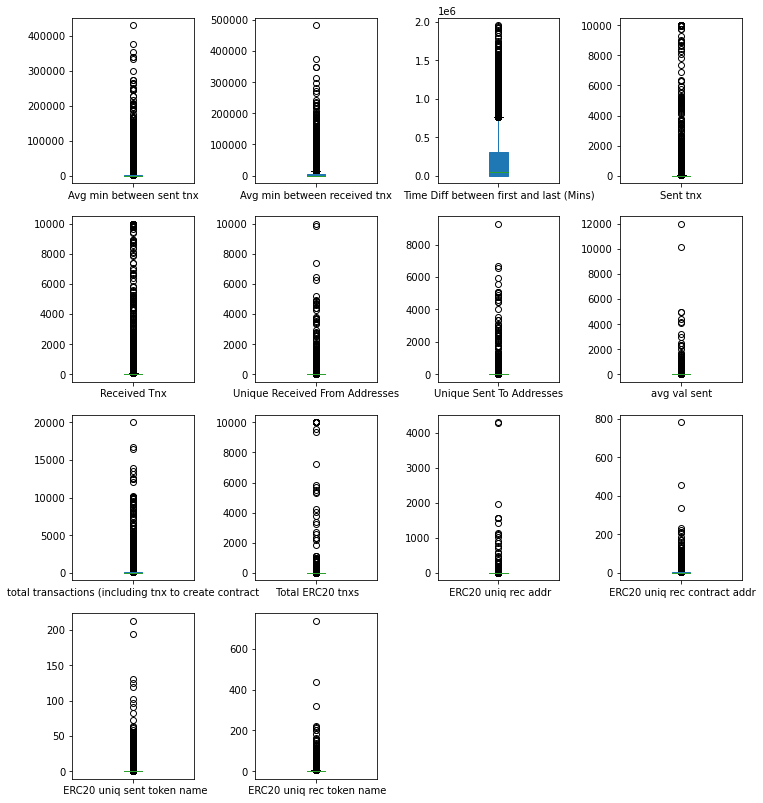

In [14]:
X.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

There seem to be so many outliers it is likely that the distribution is far from Gaussian, and thus they shouldn't be considered outliers.

We plot the distributions:

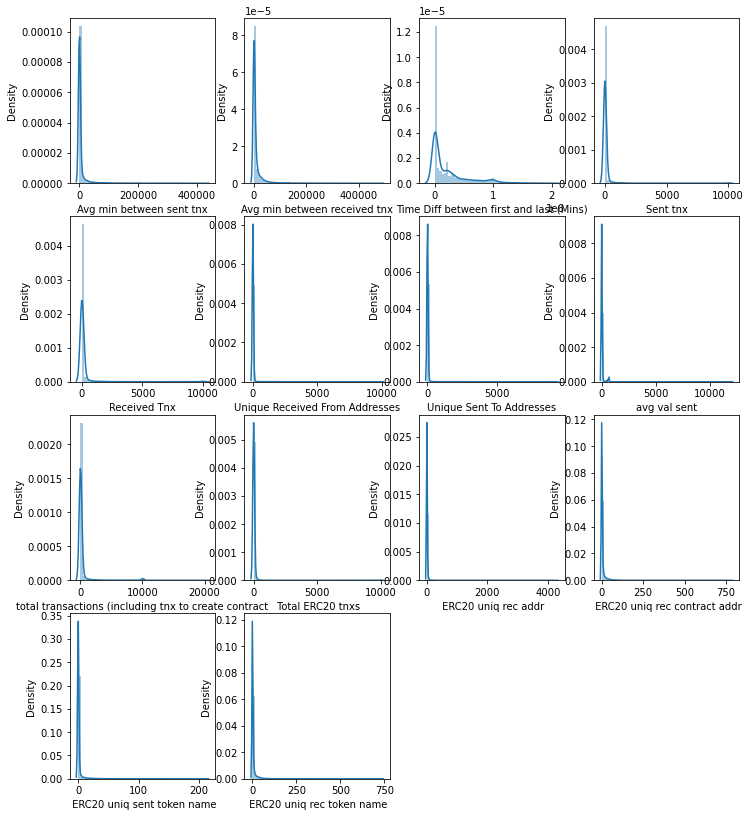

In [15]:
warnings.simplefilter(action='ignore', category=FutureWarning)

n_rows = 4
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,14))

for i, column in enumerate(X.columns):
    sns.distplot(X[column],ax=axes[i//n_cols,i%n_cols])
    
fig.delaxes(axes[3,3])
fig.delaxes(axes[3,2])

We can see that the distribution of the data isn't Gaussian. Thus there is **no strong reason to believe that values outside the IQR are outliers**, so we will use the values as is.

## 2.4 Split into Train and Test Sets<a class="anchor" id="sec2_4"></a>
Because the dataset is imbalanced, we use **stratification**. This ensures that the fraudulent class is **equally represented** on both the train and test sets.

In [16]:
# Split into training (80%) and testing set (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 14) (7872,)
(1969, 14) (1969,)


## 2.5 Clustered Heatmap of Correlations<a class="anchor" id="sec2_5"></a>

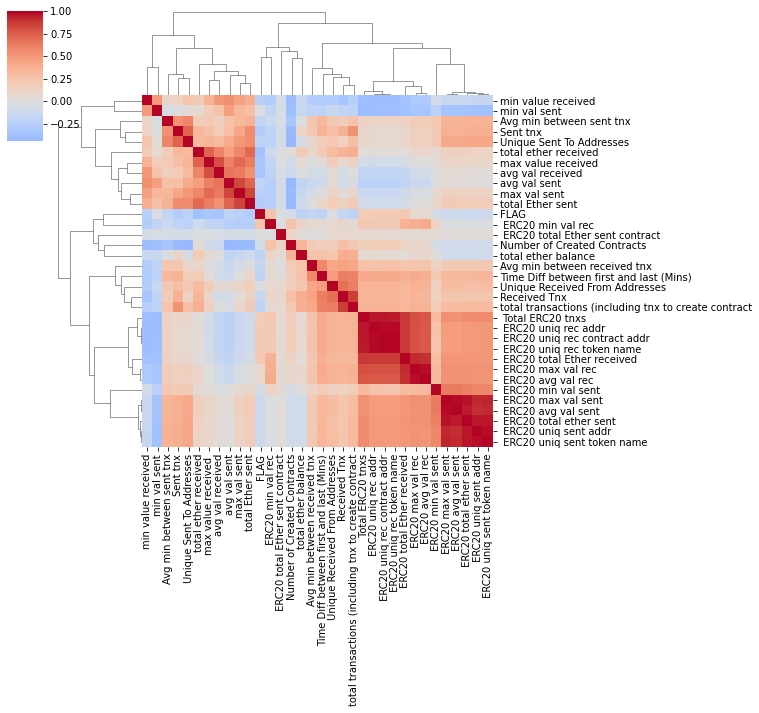

In [17]:
# calculate correlation matrix
corr = df.select_dtypes(include=np.number).corr(method = 'kendall')
sns.clustermap(corr, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

## 2.6 Normalization<a class="anchor" id="sec2_6"></a>
Normalization is the ideal choice when we know that the distribution of data **does not follow a Gaussian distribution**.

Normalization transforms the distribution, and so it distorts outliers. Because of this, it is useful **when there are no outliers**. As we saw, we have a highly skewed data distribution with no clear notion of outlier, so it is safe to normalize the data.

You **do not need to scale the Y** of train data as the algorithm or model will set the parameter values to get least Cost(error), that is k{Y(output)-Y(original)} anyway. But if the Xtrain was scaled then **the test** set(feature values, Xtest)(Scale Ytest only if the Ytrain was scaled) **needs to be scaled** (using training mean and variance) before feeding it to the model because the model hasn't seen this data before and has been trained on data with scaled range, so if the test data has a feature value diverging from the corresponding feature range in train data by a considerably high value then the model will output a wrong prediction for the corresponding test data.

In [18]:
norm = PowerTransformer()

# Normalizing training features
norm_train_f = norm.fit_transform(X_train)
# Normalizing test features
norm_test_f = norm.transform(X_test)

In [19]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)

## 2.7 Balancing the Dataset<a class="anchor" id="sec2_7"></a>
We use **Synthetic Minority Oversampling Technique** (SMOTE). This technique generates synthetic data for the minority class. SMOTE proceeds by joining the points of the minority class with line segments and then placing artificial points along those lines.

In [20]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7872, 14), (7872,))
Shape of the training after SMOTE: ((12258, 14), (12258,))


# 3. Prediction Models<a class="anchor" id="sec3"></a>
## 3.1 Logistic Regression<a class="anchor" id="sec3_1"></a>

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1533
           1       0.74      0.92      0.82       436

    accuracy                           0.91      1969
   macro avg       0.86      0.91      0.88      1969
weighted avg       0.92      0.91      0.91      1969



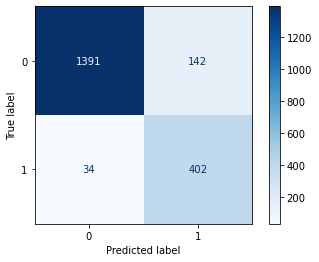

In [21]:
classifier = LogisticRegression(random_state=42)
classifier.fit(x_tr_resample, y_tr_resample)

preds = classifier.predict(norm_test_f)

print(classification_report(y_test, preds))
_ = plot_confusion_matrix(classifier, norm_test_f, y_test, cmap="Blues")

report = classification_report(y_test, preds, output_dict=True)

acc = report['accuracy']
prec = report['1']['precision']
rec = report['1']['recall']
f1 = report['1']['f1-score']

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

## 3.2 Decision Tree<a class="anchor" id="sec3_2"></a>

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1533
           1       0.91      0.94      0.92       436

    accuracy                           0.97      1969
   macro avg       0.95      0.96      0.95      1969
weighted avg       0.97      0.97      0.97      1969



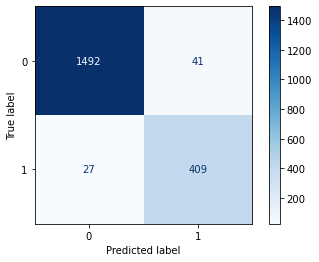

In [22]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_tr_resample, y_tr_resample)

preds = classifier.predict(norm_test_f)

print(classification_report(y_test, preds))
_ = plot_confusion_matrix(classifier, norm_test_f, y_test, cmap="Blues")

report = classification_report(y_test, preds, output_dict=True)

acc = report['accuracy']
prec = report['1']['precision']
rec = report['1']['recall']
f1 = report['1']['f1-score']

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## 3.3 Random Forest Classifier<a class="anchor" id="sec3_3"></a>

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1533
           1       0.95      0.94      0.95       436

    accuracy                           0.98      1969
   macro avg       0.97      0.96      0.97      1969
weighted avg       0.98      0.98      0.98      1969



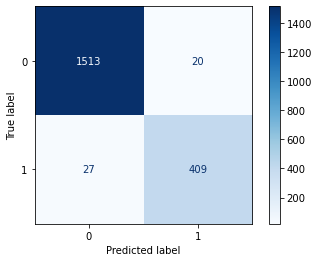

In [23]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_tr_resample, y_tr_resample)
preds = classifier.predict(norm_test_f)

print(classification_report(y_test, preds))
_ = plot_confusion_matrix(classifier, norm_test_f, y_test, cmap="Blues")

report = classification_report(y_test, preds, output_dict=True)

acc = report['accuracy']
prec = report['1']['precision']
rec = report['1']['recall']
f1 = report['1']['f1-score']

model_results = pd.DataFrame([['Random Forest Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## 3.4 XGB Classifier<a class="anchor" id="sec3_4"></a>

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1533
           1       0.94      0.96      0.95       436

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969



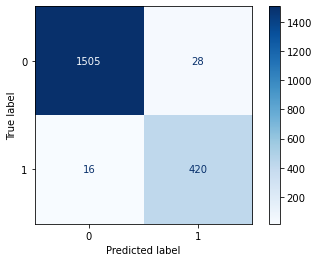

In [24]:
warnings.filterwarnings(action='ignore', category=UserWarning)

classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
classifier.fit(x_tr_resample, y_tr_resample)
preds = classifier.predict(norm_test_f)

print(classification_report(y_test, preds))
_ = plot_confusion_matrix(classifier, norm_test_f, y_test, cmap="Blues")

report = classification_report(y_test, preds, output_dict=True)

acc = report['accuracy']
prec = report['1']['precision']
rec = report['1']['recall']
f1 = report['1']['f1-score']

model_results = pd.DataFrame([['XGB Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

### ROC curve for XGB

In [25]:
probs = classifier.predict_proba(norm_test_f)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

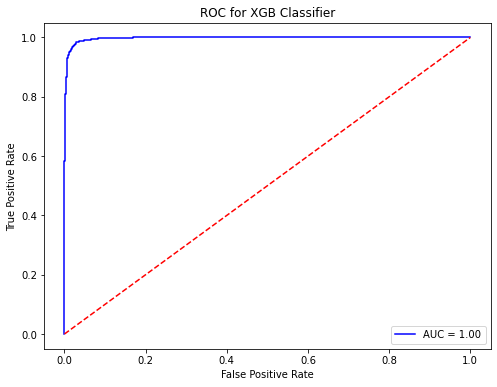

In [26]:
plt.figure(figsize=(8,6))
plt.title('ROC for XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3.5 K-Nearest Neighbors (KNN)<a class="anchor" id="sec3_5"></a>

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1533
           1       0.87      0.98      0.92       436

    accuracy                           0.96      1969
   macro avg       0.93      0.97      0.95      1969
weighted avg       0.97      0.96      0.96      1969



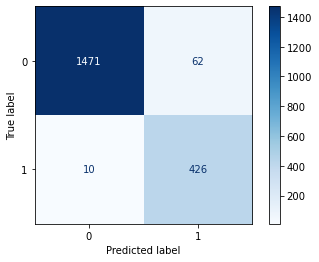

In [27]:
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(x_tr_resample, y_tr_resample)

preds = classifier.predict(norm_test_f)

print(classification_report(y_test, preds))
_ = plot_confusion_matrix(classifier, norm_test_f, y_test, cmap="Blues")

report = classification_report(y_test, preds, output_dict=True)

acc = report['accuracy']
prec = report['1']['precision']
rec = report['1']['recall']
f1 = report['1']['f1-score']

model_results = pd.DataFrame([['KNN', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## 3.6 Naive Bayes<a class="anchor" id="sec3_6"></a>

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1533
           1       0.65      0.89      0.75       436

    accuracy                           0.87      1969
   macro avg       0.81      0.88      0.83      1969
weighted avg       0.90      0.87      0.88      1969



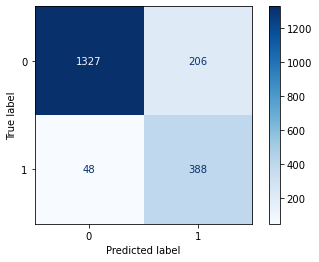

In [28]:
classifier = GaussianNB()
classifier.fit(x_tr_resample, y_tr_resample)

preds = classifier.predict(norm_test_f)

print(classification_report(y_test, preds))
_ = plot_confusion_matrix(classifier, norm_test_f, y_test, cmap="Blues")

report = classification_report(y_test, preds, output_dict=True)

acc = report['accuracy']
prec = report['1']['precision']
rec = report['1']['recall']
f1 = report['1']['f1-score']

model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

# 4. Performance Comparison for the Different Models<a class="anchor" id="sec4"></a>
Because we don't want to miss any fraudulent transaction, we want **Recall to be as high as possible**.<br>
Using this performance metric, **KNN is the best model**, although followed closely by XGB.

In [29]:
results.sort_values(by=['Recall'], ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
4,KNN,0.963433,0.872951,0.977064,0.922078
3,XGB Classifier,0.977654,0.937500,0.963303,0.950226
1,Decision Tree,0.965465,0.908889,0.938073,0.923251
2,Random Forest Classifier,0.976130,0.953380,0.938073,0.945665
0,Logistic Regression,0.910615,0.738971,0.922018,0.820408
5,Naive Bayes,0.871001,0.653199,0.889908,0.753398


# 5. Conclusion<a class="anchor" id="sec5"></a>

# What to do Next<a class="anchor" id="sec6"></a>